In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [ ]:
df= pd.read_csv('Mall_Customers.csv')

In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
X= df.iloc[:,[3]]
Y= df.iloc[:,[4]]

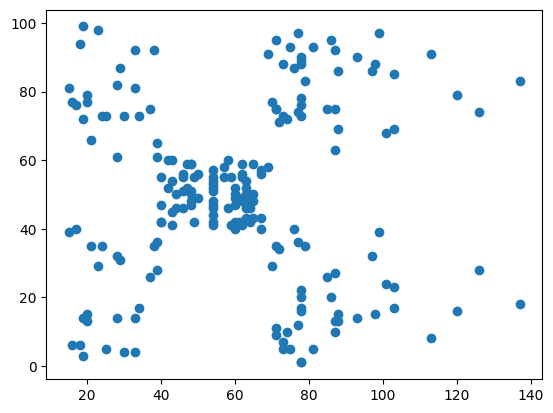

In [ ]:
plt.scatter(X,Y)

In [ ]:
Z= df.iloc[:,[3,4]]

In [ ]:
wcss= []
for i in range(1,11):
  kmeans= KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

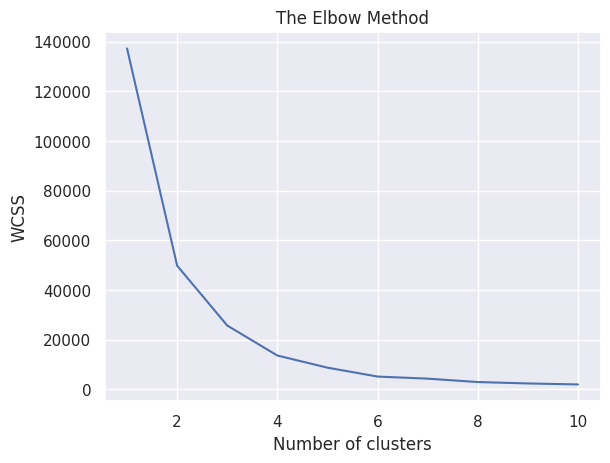

In [ ]:
sns.set()
plt.plot(range(1,11), wcss) # the minimum the value the better
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans= KMeans(n_clusters=5, init='k-means++', random_state=0)
y= kmeans.fit_predict(Z)
df['result']= pd.DataFrame(y)
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),result
0,1,Male,19,15,39,3
1,2,Male,21,15,81,4
2,3,Female,20,16,6,3
3,4,Female,23,16,77,4
4,5,Female,31,17,40,3
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,2
197,198,Male,32,126,74,1
198,199,Male,32,137,18,2


In [ ]:
labels={
    0: 'Careful',
    1: 'Standard',
    2: 'Target',
    3: 'Careless',
    4: 'Sensible'
}
df['catagory']= df['result'].map(labels)

In [ ]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),result,catagory
0,1,Male,19,15,39,3,Careless
1,2,Male,21,15,81,4,Sensible
2,3,Female,20,16,6,3,Careless
3,4,Female,23,16,77,4,Sensible
4,5,Female,31,17,40,3,Careless
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,1,Standard
196,197,Female,45,126,28,2,Target
197,198,Male,32,126,74,1,Standard
198,199,Male,32,137,18,2,Target
